# PyBer Analysis

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import os

In [2]:
# Load files
city_data_to_load = os.path.join("resources","city_data.csv")
ride_data_to_load = os.path.join("resources","ride_data.csv")

In [3]:
# Read the city data file and store it in a pandas df
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas df
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


## Inspect Data
### Inspect city data

In [5]:
# Get the columns and the rows that are not null
city_data_df.isna().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
sum(city_data_df["type"]=="Rural")

18

### Inspect ride data

In [9]:
# Get the columns and the rows that are not null.
ride_data_df.isna().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [10]:
# Get the data types of each columns
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## Merge city and ride data

In [11]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df,
                         city_data_df,
                         how = "left",
                         on = ["city","city"])

# Display the df
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Sort Data by City Type
### Separate data according to city type: Urban, Suburban, Rural

In [12]:
# Create the Urban city df.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# Creat the Suburban and Rural cities dfs.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

### Get Number of Rides for Each City Type

In [14]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [15]:
# Get the suburban and rural ride count
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

### Get Average Fair for Each City Type

In [16]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [17]:
# Get average fare for each city in suburban and rural cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

### Get Average Number of Drivers for Each City Type

In [18]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [19]:
# Get the average number of drivers for suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

## Create Bubble Charts

### Create Individual Bubble Charts and display

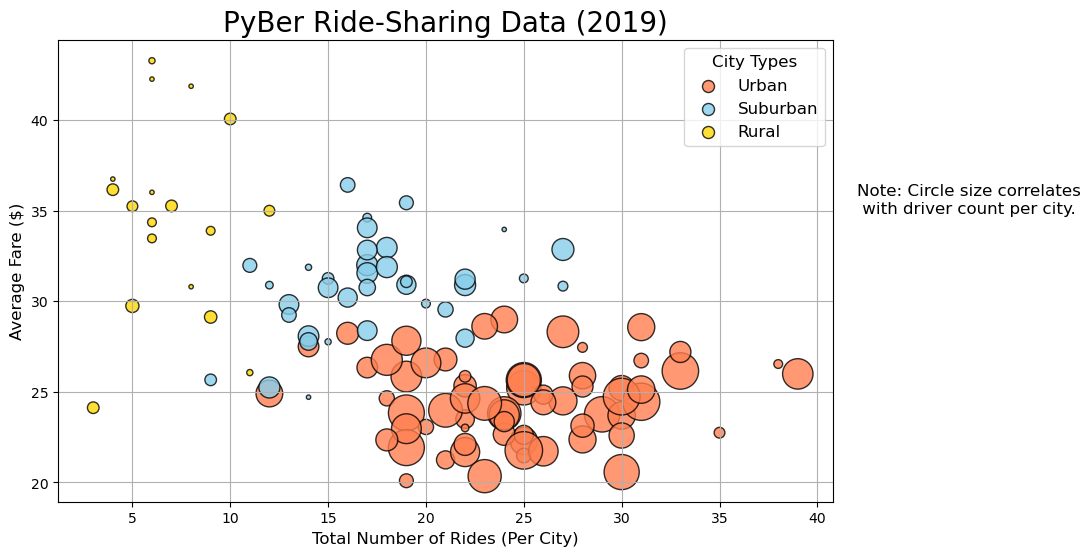

In [20]:
# Build the scatter plot for urban cities
plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count,
            urban_avg_fare,
            s = 10 * urban_driver_count,
            color = "coral",
            edgecolor = "black",
            linewidths = 1,
            alpha = 0.8,
            label = "Urban")

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s = 10 * suburban_driver_count,
           color = "skyblue",
           edgecolor = "black",
           linewidths = 1,
           alpha = 0.8,
           label = "Suburban")

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s = 10 * rural_driver_count,
           color = "gold",
           edgecolor = "black",
           linewidths = 1,
           alpha = 0.8,
           label = "Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)

# Create a legend

lgnd = plt.legend(fontsize = "12",
                 mode = "Expanded",
                 scatterpoints = 1,
                 loc = "best",
                 title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add text explaining circle size
plt.text(42,35,"Note: Circle size correlates\n with driver count per city.", fontsize="12",wrap = True)

# Save the figure
plt.savefig("analysis/Fig1.png",bbox_inches="tight")

plt.show()

## Summary Statistics
### Rides by City Type

In [21]:
# Urban Cities Summary Statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [22]:
# Urban ride count Summary Statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [23]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2),round(suburban_ride_count.mean(),2),round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [24]:
# Calculate the median of the ride count for each city type.
urban_ride_count.median(),suburban_ride_count.median(),rural_ride_count.median()

(24.0, 17.0, 6.0)

In [25]:
# Calculate the mode of the ride count for each city type.
suburban_ride_count.mode()

0    17
dtype: int64

In [26]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


### Fare by City Type

In [27]:
# Get the fares for the city types
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [28]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


### Drivers by City Type

In [29]:
# Get the driver count data from the city types.
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [30]:
suburban_drivers.mean()

13.712

### Box and Whisker Plots

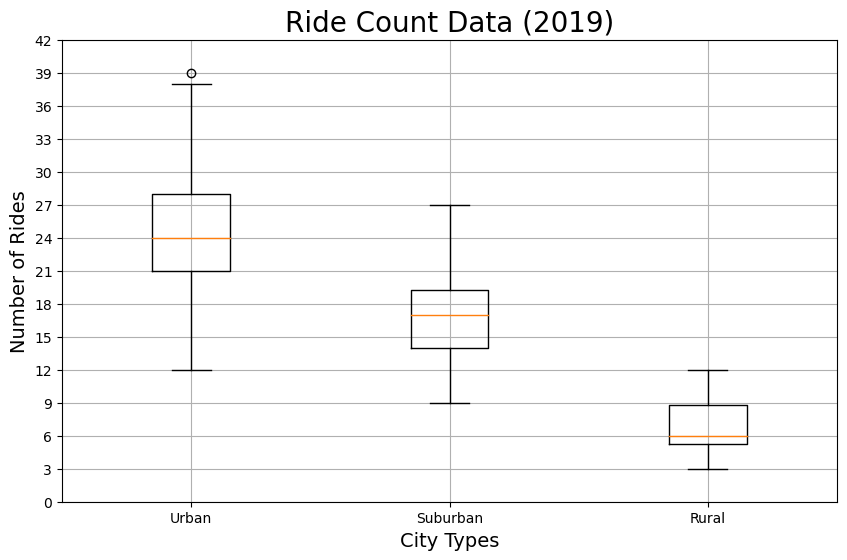

In [31]:
# Create a box and whisker plot for the ride count data.
x_labels = ["Urban","Suburban","Rural"]
ride_count_data = [urban_ride_count,suburban_ride_count,rural_ride_count]
fig, ax = plt.subplots(figsize = (10,6))
ax.set_title("Ride Count Data (2019)", fontsize = 20)
ax.set_ylabel("Number of Rides", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.boxplot(ride_count_data,labels=x_labels)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
plt.savefig("analysis/Fig2.png")
plt.show()

In [32]:
# Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


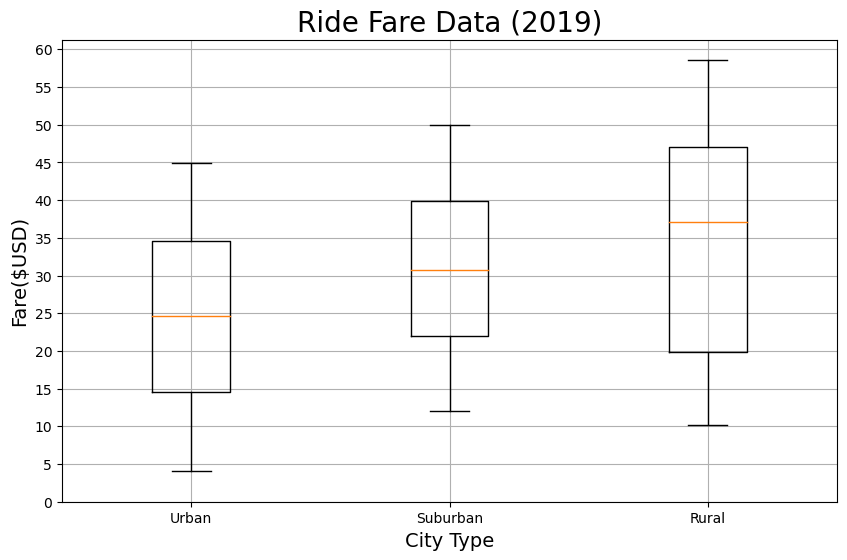

In [33]:
# Create box and whisker plots for fare data.
x_labels = ["Urban","Suburban","Rural"]
fare_data = [urban_fares,suburban_fares,rural_fares]
fig, ax = plt.subplots(figsize = (10,6))
ax.set_title("Ride Fare Data (2019)",fontsize = 20)
ax.set_ylabel("Fare($USD)",fontsize = 14)
ax.set_xlabel("City Type",fontsize = 14)
ax.boxplot(fare_data,labels = x_labels)
ax.set_yticks(np.arange(0,61,step=5.0))
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()

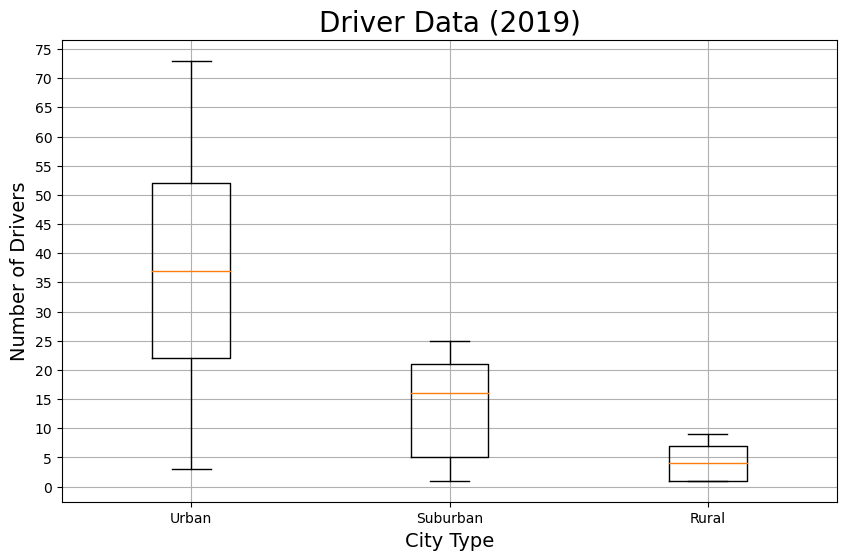

In [34]:
# Create box and whisker plots for fare data.
x_labels = ["Urban","Suburban","Rural"]
fare_data = [urban_drivers,suburban_drivers,rural_drivers]
fig, ax = plt.subplots(figsize = (10,6))
ax.set_title("Driver Data (2019)",fontsize = 20)
ax.set_ylabel("Number of Drivers",fontsize = 14)
ax.set_xlabel("City Type",fontsize = 14)
ax.boxplot(fare_data,labels = x_labels)
ax.set_yticks(np.arange(0,76,step=5.0))
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()